In [1]:
trainpath=r"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\train"
testpath=r"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\test"

In [2]:
import tensorflow
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, load_img
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,GlobalAveragePooling2D 
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

In [3]:
import tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size=180
img_size_dim=[180,180]
dimension=(img_size,img_size)
zoom=[0.99,1.01]
bright=[0.8,1.2]
fill_mode='constant'
data_format='channels_last'
dir="D:/Winter Semester 3/AIML/Project\Alzheiemer_image/Alzheimer_s Dataset/train"
data_gen = ImageDataGenerator(rescale=1./255,brightness_range=bright,zoom_range=zoom,data_format=data_format,fill_mode=fill_mode,horizontal_flip=True)
#data_gen=IDG(rescale=1./255,brightness_range=bright,zoom_range=zoom,data_format=data_format,fill_mode=fill_mode,horizontal_flip=True)
train_data_gen=data_gen.flow_from_directory(directory="D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/train",target_size=dimension,batch_size=6000,shuffle=False)

Found 5121 images belonging to 4 classes.


In [4]:
# Fetch a batch of training data and labels
train_data, train_labels = train_data_gen.__next__()
# Print the shape of the training data and labels
print(train_data.shape, train_labels.shape)


(5121, 180, 180, 3) (5121, 4)


In [5]:
#handling imbalanced classes
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=47)
train_data,train_labels=sm.fit_resample(train_data.reshape(-1,img_size*img_size*3),train_labels)
train_data=train_data.reshape(-1,img_size,img_size,3)
print(train_data.shape,train_labels.shape)

(10240, 180, 180, 3) (10240, 4)


In [6]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)
train_data,val_data,train_labels,val_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)

In [10]:
mt=[tensorflow.keras.metrics.CategoricalAccuracy(name='Accuracy'),tensorflow.keras.metrics.AUC(name='AUC')]

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 4  # Alzheimer's and non-Alzheimer's

# Load ResNet-50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze some layers and fine-tune others
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom classification layers on top of ResNet-50
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)  # Increase the number of neurons
x = Dense(128, activation='relu')(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # for integer labels
              metrics=['accuracy'])

# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    "D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    r"D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='validation'
)

model.summary()


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 36,457,924 (139.08 MB)

 Trainable params: 17,335,876 (66.13 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [22]:
# Train the model with increased epochs
history=model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5224 - loss: 0.9550

c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.5224 - loss: 0.9552 - val_accuracy: 0.5039 - val_loss: 1.1825
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5202 - loss: 0.9779 - val_accuracy: 0.5039 - val_loss: 1.0819
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.5289 - loss: 0.9380 - val_accuracy: 0.4764 - val_loss: 1.0097
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5271 - loss: 0.9382 - val_accuracy: 0.5276 - val_loss: 0.9971
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5378 - loss: 0.9366 - val_accuracy: 0.5000 - val_loss: 1.0683
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5240 - loss: 0.9433 - val_accuracy: 0.4843 - val_loss: 1.0283
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5434 - loss: 0.9212 - val_accuracy: 0.4094 - val_loss: 1.0097
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5436 - loss: 0.9148 - val_accuracy: 0.503

In [58]:
from keras.models import Model

def freeze_layers(model):
    for i in model.layers:
        i.trainable = False
        if isinstance(i, Model):
            freeze_layers(i)
    return model

In [59]:
model_freezed = freeze_layers(model)
model_freezed.save('alzheimer_res3.h5')

In [61]:
test_model=load_model(r"C:\Users\harsa\Downloads\alzheimer_res3.h5")

In [62]:
img=image.load_img(r"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\test\NonDemented\26 (62).jpg")
img=img.resize((180,180))

In [63]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [64]:
from tensorflow.image import resize

# Resize input data to match the model's input shape (224x224)
x_resized = resize(x, (224, 224))

# Preprocess input data if needed (e.g., normalize, scale)
x_preprocessed = preprocess_input(x_resized)

# Make predictions using the preprocessed input data
predictions = test_model.predict(x_preprocessed)
print(np.argmax(predictions, axis=1)[0])  # Example: Get the predicted class


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
2


Found 1025 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


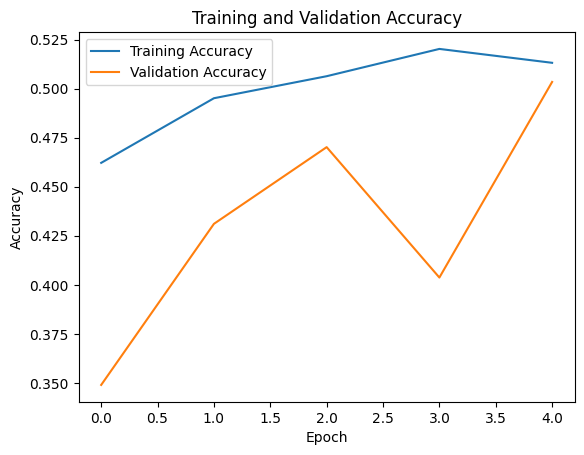

c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4874 - loss: 1.0485
Test Loss: 1.0560160875320435
Test Accuracy: 0.48878049850463867
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step
Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       144
ModerateDemented       0.00      0.00      0.00        10
     NonDemented       0.49      0.75      0.60       512
VeryMildDemented       0.33      0.23      0.27       359

        accuracy                           0.45      1025
       macro avg       0.21      0.24      0.22      1025
    weighted avg       0.36      0.45      0.39      1025



c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [16]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
test_generator = train_datagen.flow_from_directory(
    "D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    "D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='validation'
)
# Train the model
#history = model.fit(train_generator, epochs=2, validation_data=validation_generator)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions for test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)


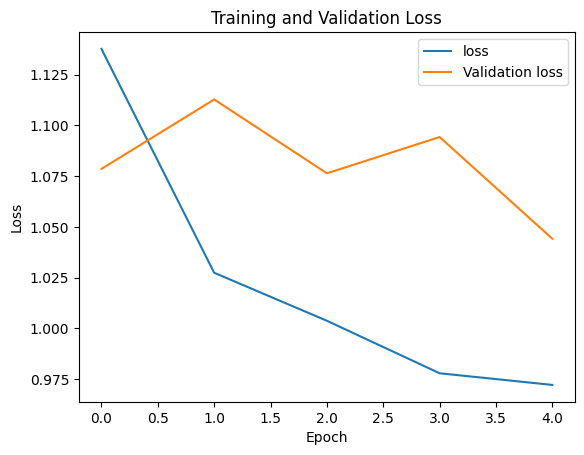

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


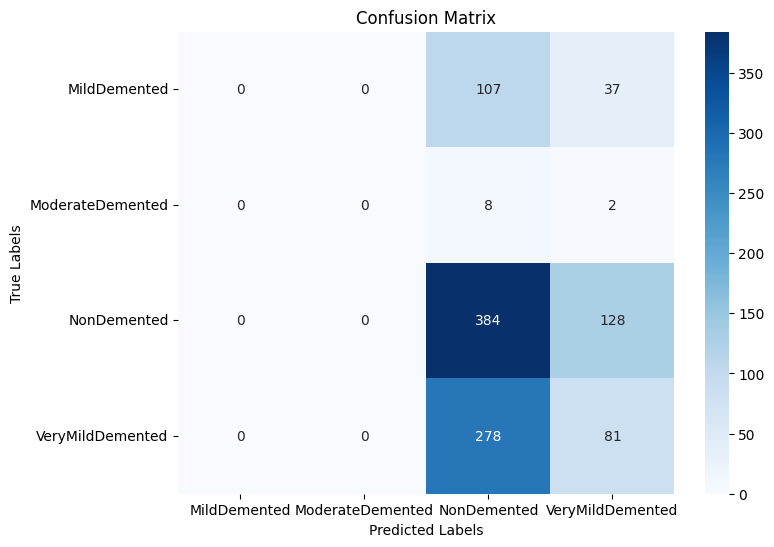

In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "D:/Winter Semester 3/AIML/Project/Alzheiemer_image/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # binary classification
)

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Found 1279 images belonging to 4 classes.


c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4874 - loss: 1.0317
Test Loss: 1.0443718433380127
Test Accuracy: 0.49726349115371704


In [21]:
# Generate predictions for test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

40/40 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step
Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      0.90      0.64       640
VeryMildDemented       0.35      0.10      0.16       448

        accuracy                           0.48      1279
       macro avg       0.21      0.25      0.20      1279
    weighted avg       0.37      0.48      0.38      1279



c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,